In [3]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v3 as iio
from scipy.fft import fft2, ifft2, fftshift, ifftshift, fftfreq

In [58]:
def gaussian_filter(size, epsilon):
    x_l, y_l = size
    x_ = np.arange(-x_l//2, x_l//2, 1.0)
    y_ = np.arange(-y_l//2, y_l//2, 1.0)
    x, y = np.meshgrid(x_, y_)
    g = (1/epsilon*np.sqrt(2*np.pi))*np.exp(-0.5*(x**2 + y**2)/epsilon**2)
    
    return g/np.sum(g)

(-0.5, 629.5, 629.5, -0.5)

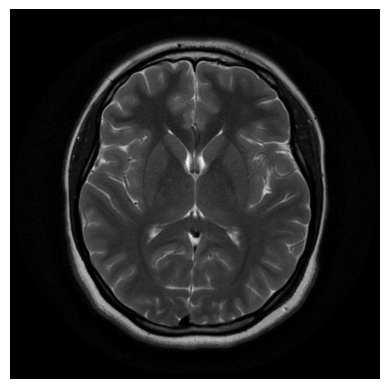

In [41]:
# img = iio.imread("axial_brain_2.png")
img = iio.imread("axial_brain.jpeg")

plt.imshow(img, cmap = "gray")
plt.axis("off")

1.0


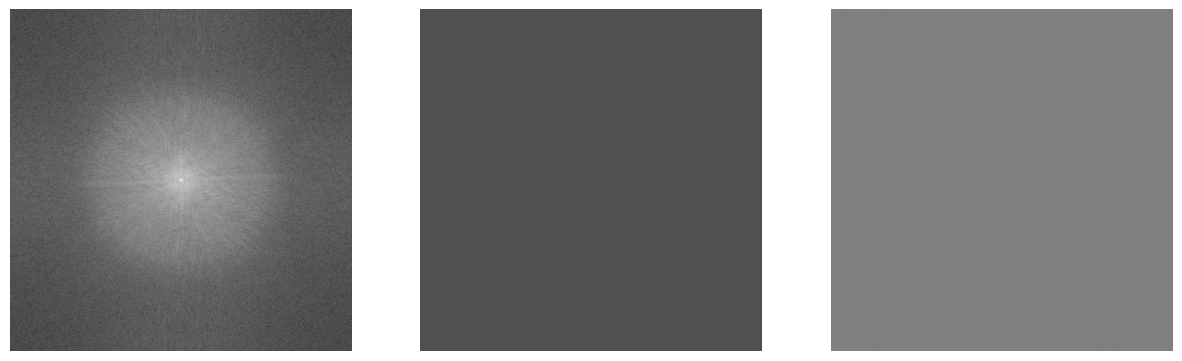

In [77]:
imgfft = fft2(img)
imgfft = fftshift(imgfft)

plt.figure(figsize=(15, 15))
plt.subplot(131)
plt.imshow(np.log(np.abs(imgfft)), cmap = "gray")
plt.axis("off")

plt.subplot(132)
plt.imshow(imgfft.real, cmap = "gray")
plt.axis("off")

plt.subplot(133)
plt.imshow(imgfft.imag, cmap = "gray")
plt.axis("off")

imgfft = imgfft*gaussian_filter(imgfft.shape, 20.0)

print(np.sum(gaussian_filter(imgfft.shape, 50.0)))

(-0.5, 629.5, 629.5, -0.5)

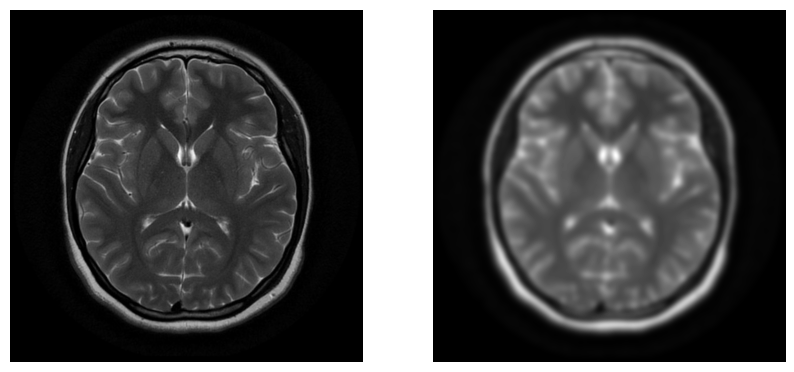

In [78]:
inv = ifft2(ifftshift(imgfft))

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img, cmap = "gray")
plt.axis("off")

plt.subplot(122)
plt.imshow(inv.real, cmap = "gray")
plt.axis("off")

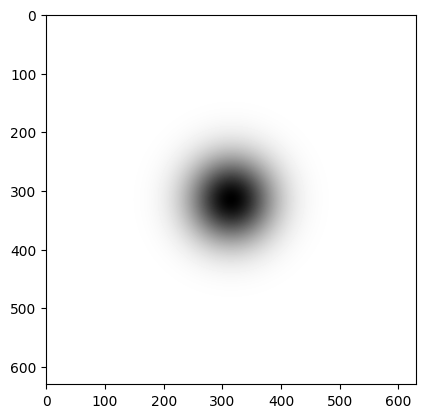

In [79]:
plt.imshow(1.0 - gaussian_filter(img.shape, 50.0), cmap = "gray")